# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [6]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [7]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [8]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 587


### 3. Distinct Affiliations

In [9]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 229 occurences
Studia Universitas Babes-Bolyai : 13 occurences
Studia Universitatis "Babes-Bolyai" : 13 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
International Journal of Computers : 7 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Knowledge Engineering: Principles and Techniques : 4 occurences
Studia Universitatis Babes- : 4 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences
The International Journal of Information Technology and Intelligent Computing : 2 occurences
EuroGP2006 & EvoCOP2006 : 2 occurences
Acta Universitatis Apulensis : 2 occurences
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics : 2 occurences
the 2016 IEEE 12th I

In [10]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
rd Balkan Conference in Informatics
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st Interna

In [11]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
International Journal on Artificial Intelligence Tools (IJAIT)
The International Journal of Information Technology and Intelligent Computing
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [12]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitas',
 'Babes-Bolyai',
 'Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'International',
 'Journal',
 'of',
 'Computers',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'Studia',
 'Universitatis',
 'Babes-',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tools',
 '(IJAIT)',
 'Applied',
 'Soft',
 'Computing',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 'Technology',
 'and',
 'Intelligent',
 'Computing',
 'EuroGP2006',
 '&',
 'EvoCOP2006',
 'Acta',
 'Universitatis',
 'Apulensis',
 'MECO45',
 '45th',
 'Conference',
 'of',
 'the',
 'Middle',
 'European',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


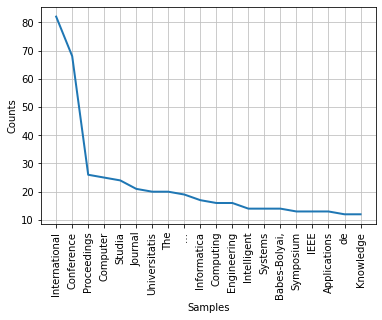

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [14]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [18]:
print(vectorizer.get_feature_names())

['10', '17th', '1985', '1996', '1999', '19th', '2007', '2009', '2014', '2015', '2018', '24', '27', '3d', 'abordare', 'abordari', 'about', 'abstract', 'academic', 'accelerate', 'acceleration', 'accelerometer', 'access', 'accessibility', 'according', 'accurate', 'acivs', 'acknowledgement', 'aco', 'acquired', 'acrylonitrile', 'action', 'active', 'activitatii', 'activities', 'activity', 'actuala', 'adapting', 'adaptive', 'additional', 'administration', 'advanced', 'agent', 'agenti', 'agentilor', 'agents', 'agglomerative', 'aggregated', 'aggregation', 'agile', 'ai', 'aided', 'algebra', 'algebraic', 'algorithm', 'algorithmic', 'algorithms', 'algoritmi', 'alignement', 'aligning', 'alignment', 'allocation', 'alteration', 'alterations', 'american', 'an', 'anal', 'analogy', 'analysing', 'analysis', 'analytics', 'analyze', 'ancient', 'and', 'android', 'answer', 'ant', 'antioxidant', 'ants', 'aop', 'ap041', 'aplicati', 'aplicatii', 'aplicatiile', 'aport', 'applicability', 'application', 'applicati

In [19]:
print(X.shape)

(587, 1264)


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [22]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,10,17th,1985,1996,1999,19th,2007,2009,2014,2015,...,workflow,wrist,writing,wyliodrin,xml,year,your,zsuzsanna,évolutive,în
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,19th,2-4,2007,...,your,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

In [26]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(word, row)

'inteligenta 0.38118136936474495
1 0.5411307869593889
10 0.5222413852928162
10 0.6033811331373872
17th 0.3292025313943079
1985–1996 0.29871001847369927
1999 0.2699501996379654
1999-molecular 0.2699501996379654
19th 0.24010858556078016
2-4 0.31585867176115
2007 0.436347158833479
2009 0.6317173435223
2014 0.5436102888521113
2015 0.5436102888521113
2018 0.4802171711215603
24–27 0.24010858556078016
3d 0.3778306719815315
7 0.47332310008999323
abordar 0.27813963282565546
abordari 0.3663622234766486
abstract 0.48987688242346716
academ 0.3263442645075038
academ 0.3033642655530811
academ 0.5
acceler 0.5349591666323895
acceler 0.41645178402054706
acceleromet 0.44706584523406734
access 0.36799393478092146
access 0.4165938798718883
access 0.4487970385626047
accord 0.3097441747434354
accur 0.4649512101312421
aciv 0.24010858556078016
acknowledg 0.3649591496302001
aco 0.4803350809579964
acquir 0.39776360086044116
acquir 0.41212396428575576
acrylonitril 0.49128776298024956
action 0.4325165508550205
ac

coevolv 0.47956580083633144
coil 0.40042651691100734
coil 0.39621344599258335
collabor 0.37845654255202316
collabor 0.3416533271551165
collabor 0.3853413177640766
collabor 0.4789270426731223
collabor 0.370684547187151
collabor 0.4968589864467276
collabor 0.3349907954812813
collabor 0.36878330808485027
collabor 0.5376171278694106
collabor 0.4086196306721692
collabor 0.40638809972720036
collabor 0.529408770662837
collabor 0.5513872994495872
collabor 0.3814168676457481
colocviul 0.3263442645075038
colocviul 0.3033642655530811
colocviul 0.5
coloni 0.4804733246585997
coloni 0.45461732068791655
color 0.42377203952138903
color 0.2152071712134862
color 0.42251414109760493
colorect 0.3750104940211321
combin 0.37340055862432536
combin 0.3704083632746011
combinatori 0.46222050872315595
combinatori 0.5864195439258311
combinatori 0.44869219710981284
combinatori 0.520700568601788
combinatori 0.46153693402851187
combinatori 0.4438641415888033
combinatori 0.556557421262507
comdevalco 0.466901411652413

fine-grain 0.41965180610294134
fine-grain 0.41251294483214224
fingerprint 0.44832497583346625
finit 0.39401049231351376
finit 0.38169164965296765
firewal 0.47332310008999323
fit 0.4398015282186382
fit 0.42479629931624474
fit 0.45900340453059246
fix 0.3680235572948286
flaw 0.5490474548039647
fleet 0.3680235572948286
flow 0.43119026120982773
fold 0.4675205440084156
fold 0.5411650773065165
fold 0.4427557115202749
fold 0.558566910835243
force-direct 0.5133259046712713
forecast 0.5013173380528507
form 0.5100755988072859
formal 0.2702152933631429
formal 0.49347220869019137
formal 0.28272935309938946
formal 0.2928511457028351
formal 0.29636801339847824
formal 0.35713009559232806
formal 0.4645926025649839
formal 0.5180431614873255
formal 0.6330369435298855
format 0.4137629482840599
format 0.5652050559359931
formelor 0.42378836294142613
four-phas 0.31952267444148497
fourth 0.43154052601747195
fpca 0.27146762651522893
fpga-bas 0.48287445698571074
fragment 0.42370901844976905
fragment 0.398869964

model 0.19276323561745715
model 0.34938268850687393
model 0.22729433771740126
model 0.3700600382253113
model 0.26692140214978755
model 0.2596132413071063
model 0.24749975624866885
model 0.33710045071291245
model 0.25550397106792555
model 0.18193134267683017
model 0.27396777507014647
model 0.27809708021838814
model 0.2631830044522759
model 0.22801127365502702
model 0.26472812868688944
model 0.28159839207345183
model 0.3135778470212097
model 0.29522238187730593
model 0.27579967031882907
model 0.2749948712996205
model 0.17397016667543583
model 0.26791467971962485
model 0.24098226706919426
model 0.29184469277498537
model 0.30845922815694987
model 0.33951982770121064
model 0.34010856835143355
model 0.2221718354605153
model 0.29793216797125066
model 0.3042961322636084
model 0.3127148207957104
model 0.3531310999246271
model 0.3667791404169506
model 0.26206230840402134
modeling-structur 0.2699501996379654
modern 0.32516121101489454
modern 0.42972968878035306
modul 0.5162432230394876
modular 0.

sensit 0.4127792524630725
sensit 0.3969734490390126
sensit 0.4977615860474578
sensit 0.40141112857671774
sensit 0.5617344310245433
sensor 0.42345272413684515
sentiment 0.5568661088476888
septemb 0.24010858556078016
sequenc 0.41751206040885336
sequenc 0.4583566998672492
sequenc 0.5001064540895468
sequenc 0.47334377371683534
sequenc 0.43101114383480943
sequenc 0.41124000679497075
seri 0.4442340733133409
seri 0.3739399574700944
seri 0.48872083798198007
servic 0.4813327787492443
servic 0.5232621810070719
servic 0.5245625104040427
service-ori 0.25259441593838916
service-ori 0.4233686940429868
session 0.3649591496302001
set 0.3382857979877585
set 0.4622886960701413
set 0.4139841878016828
set 0.2961236979075472
set 0.47000114540256926
set 0.37311157101737724
set 0.4516987013194876
set 0.27741870427434395
set 0.29080118270020827
set 0.2981005500511186
set-theori 0.39433077871479827
shape 0.36529521467176895
shape 0.3507263294002416
shape-output 0.4956359697482329
shift 0.31952267444148497
shor

In [27]:
from sklearn.cluster import KMeans

In [28]:
number_of_clusters = 10

In [29]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [30]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: use model fuzzi approach base
Cluster 1: learn reinforc order microarray solv
Cluster 2: cluster softwar use fuzzi data
Cluster 3: evolutionari search structur protein collabor
Cluster 4: cellular network automata detect rule
Cluster 5: design distribut multi-ag improv softwar
Cluster 6: intellig support decis home monitor
Cluster 7: problem compon solv algorithm select
Cluster 8: genet program kernel svm optimis
Cluster 9: aspect base cluster techniqu evalu


In [32]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [33]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  Implementing Efficient Data Synchronization for Mobile Wireless Medical Users
0  ---  OVERVIEW OF FUZZY METHODS FOR EFFORT ESTIMATION BY ANALOGY.
0  ---  Lighting quality-component of indoor environment
0  ---  Urban bicycles renting systems: Modelling and optimization using nature-inspired search methods
0  ---  Distance Learning and Supporting Tools at Babeş-Bolyai University
0  ---  CHARACTERIZATION AND CLASSIFICATION OF MEDICINAL PLANT EXTRACTS ACCORDING TO THEIR ANTIOXIDANT ACTIVITY USING HIGH-PERFORMANCE LIQUID CHROMATOGRAPHY AND MULTIVARIATE ANALYSIS.
0  ---  On the Selection of Key Features for Android Malware Characterization
0  ---  SPECTROPHOTOMETRIC CHARACTERIZATION OF ROUMANIAN MEDICINAL HERBS ASSISTED BY ROBUST CHEMOMETRICS EXPERTISE
0  ---  The Best Writing on Mathematics 2015
0  ---  The Best Writing on Mathematics 2014
0  ---  Improving Human Activity Recognition and its Application in Early Stroke Diagnosis
0  ---  S4MPLEâSampler for Multiple Protein-Ligand 

In [34]:
### GENSIM

In [35]:
from gensim.models import word2vec
from gensim.test.utils import common_texts, get_tmpfile

In [36]:
tokenized_sentences = [[j.lower() for j in st.split() if j not in stopwords.words('english')] for st in corpus]

In [37]:
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [38]:
model.save("word2vec.model")

In [39]:
model = word2vec.load("word2vec.model")

AttributeError: module 'gensim.models.word2vec' has no attribute 'load'

In [ ]:
model

In [40]:
model.wv["study"]

array([-2.6192900e-03,  3.4345884e-03, -2.2514637e-03, -2.1007245e-04,
       -2.2735039e-03,  3.6199850e-03,  1.2872034e-03, -2.0700668e-03,
        2.6657863e-03,  3.0673468e-03,  1.9920426e-03,  2.4098305e-03,
       -1.0096928e-03, -5.2135414e-03,  3.5456279e-03,  1.4208117e-03,
        2.0899470e-03, -3.1633615e-03,  4.7284774e-03, -7.5543212e-05,
        3.1833611e-03, -1.2993744e-03,  4.2029622e-04,  4.0909979e-03,
        2.4966828e-03, -3.5145986e-03,  2.2586766e-03, -2.1796527e-03,
        4.2778417e-03, -1.5941767e-03, -1.3588911e-03, -2.1589219e-03,
       -7.4974354e-04, -3.4324913e-03, -1.4161948e-03,  4.1282321e-03,
       -7.4584258e-04, -2.3124376e-03, -3.1419073e-03, -1.1903530e-03,
       -5.8205880e-04,  4.9868802e-04, -1.7272636e-03,  2.2814588e-03,
        2.5033901e-04,  3.8379310e-03, -2.0631475e-03, -4.2199576e-04,
       -4.5531993e-03, -5.2127000e-03, -1.2077678e-03, -5.9975823e-04,
       -1.8545436e-03, -4.2537716e-03,  3.6587645e-03, -5.4435767e-03,
      

In [41]:
words = list(model.wv.vocab)

In [42]:
print(words)

['a', 'comparative', 'study', 'software', 'architectures', 'mobile', 'applications', 'the', 'use', 'simple', 'cellular', 'automata', 'image', 'processing', 'support', 'vector', 'machine', 'boosting', 'based', 'multiclass', 'classification', 'traffic', 'scene', 'obstacles', 'obstacle', 'recognition', 'adapting', 'hog', 'descriptor', 'learning', 'layers', 'descriptors', 'fusion', 'genetic', 'programming', 'breast', 'cancer', 'detection', 'multi-objective', 'using', 'multi-expression', 'pedestrian', 'kernel', 'improving', 'performance', 'genetically', 'optimisation', 'shape', 'hyper-parameters', 'how', 'kernels', 'can', 'influence', 'alignment', 'custom', 'standards', 'algorithms', 'model', 'concept', 'definition', 'evolutionary', 'design', 'linear', 'representation', '–', 'survey', 'an', 'autonomous', 'gp-based', 'system', 'regression', 'problems', 'what', 'else', 'evolution', 'pso', 'telling', 'us?', 'coalition', 'formation', 'full', 'connected', 'scale', 'free', 'networks', 'functions'

In [43]:
X = model[model.wv.vocab]

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [44]:
df = pd.DataFrame(df)

In [45]:
df.shape

(587, 1051)

In [46]:
df.head()

,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,19th,2-4,2007,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import numpy as np

In [48]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in model.wv.vocab:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in model[word]]) + "\n")
    
out_v.close()
out_m.close()

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
